In [43]:
import pandas as pd
# ! pip install supervenn
from supervenn import supervenn

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aligned_res_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/chosen_aligned_peaks.csv'

aligned_res = pd.read_csv(aligned_res_file)


In [36]:
metadata_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/combined_metadata.csv'
umap_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/umap_df_std_1.csv'
pca_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/pca_df_std_1.csv'
# peaks_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/combined_study.csv'


In [33]:
metadata = pd.read_csv(metadata_file, index_col=0)
cohort_labels = metadata['label6']
resuld_ids = metadata['Result_ID']
# map the result ids to the cohort labels
resuld_id_to_label = dict(zip(resuld_ids, cohort_labels))
# map cohort labels to unique colors from tab10
cohort_label_to_color = dict(zip(cohort_labels.unique(), plt.cm.tab10.colors))

#map resuld ids to the unique colors
resuld_id_to_color = {k:cohort_label_to_color[v] for k,v in resuld_id_to_label.items()}

In [50]:
metadata.shape

(10730, 52)

In [9]:
nan_locs = aligned_res.isna()

rcc_fts = aligned_res['ST001236_and_ST001237']
align_summary = aligned_res.copy()
for col in aligned_res.columns:
    align_summary[col] = rcc_fts

align_summary[nan_locs] = None  

sets = [set(align_summary[col].dropna()) for col in align_summary.columns]
set_names = align_summary.columns

/var/folders/zk/pr84pr3n16z3yzz_rrstxmmc0000gn/T/ipykernel_53390/3879726313.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=color, label=label)


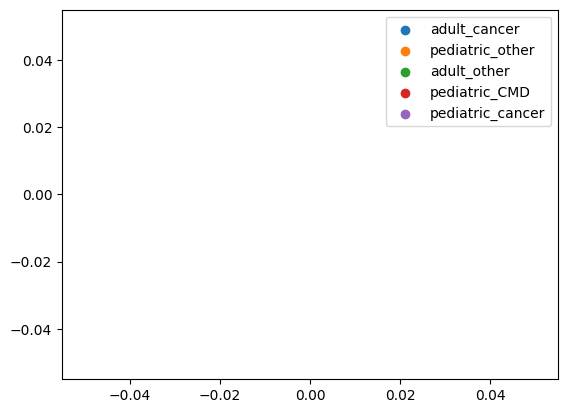

In [35]:
# createa plot that displays the color along with the cohort label
fig, ax = plt.subplots()
for label, color in cohort_label_to_color.items():
    ax.scatter([], [], c=color, label=label)
ax.legend()


[Text(0, 0, 'adult_cancer'),
 Text(1, 0, 'pediatric_other'),
 Text(2, 0, 'adult_other'),
 Text(3, 0, 'pediatric_CMD'),
 Text(4, 0, 'pediatric_cancer')]

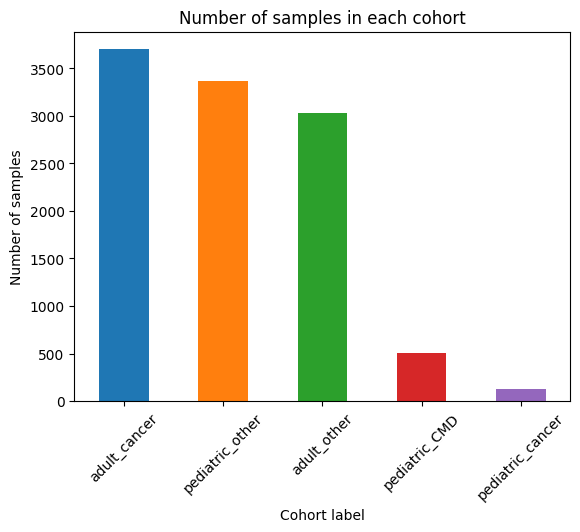

In [40]:
# create a bar plot with the number of samples in each cohort label
fig, ax = plt.subplots()
metadata['label6'].value_counts().plot(kind='bar', ax=ax, color=[cohort_label_to_color[label] for label in metadata['label6'].unique()])
ax.set_title('Number of samples in each cohort')
ax.set_ylabel('Number of samples')
ax.set_xlabel('Cohort label')
ax.set_xticklabels(metadata['label6'].unique(), rotation=45) 

[Text(0, 0, 'ST001236_and_ST001237'),
 Text(1, 0, 'ST001422'),
 Text(2, 0, 'ST002331'),
 Text(3, 0, 'ST001931'),
 Text(4, 0, 'ST002112'),
 Text(5, 0, 'ST001428'),
 Text(6, 0, 'ST001932'),
 Text(7, 0, 'ST002238'),
 Text(8, 0, 'ST001519')]

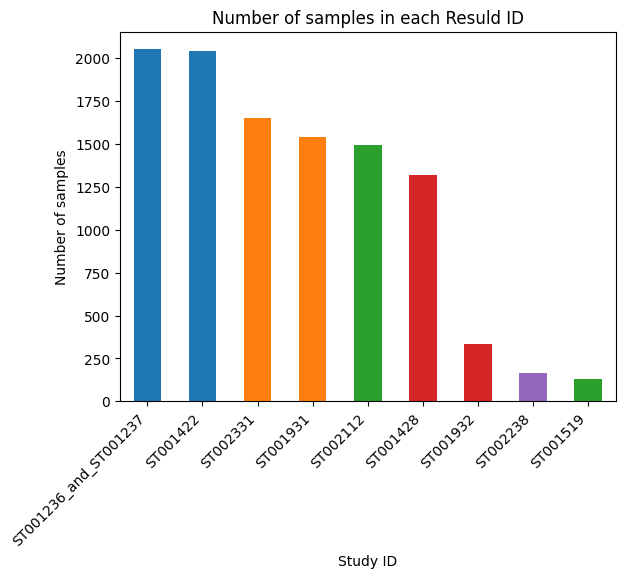

In [42]:
# create a bar plot with the number of samples in each Result ID
fig, ax = plt.subplots()
metadata['Result_ID'].value_counts().plot(kind='bar', ax=ax, color=[resuld_id_to_color[label] for label in metadata['Result_ID'].unique()])
ax.set_title('Number of samples in each Resuld ID')
ax.set_ylabel('Number of samples')
ax.set_xlabel('Study ID')
ax.set_xticklabels(metadata['Result_ID'].unique(), rotation=45, ha='right')


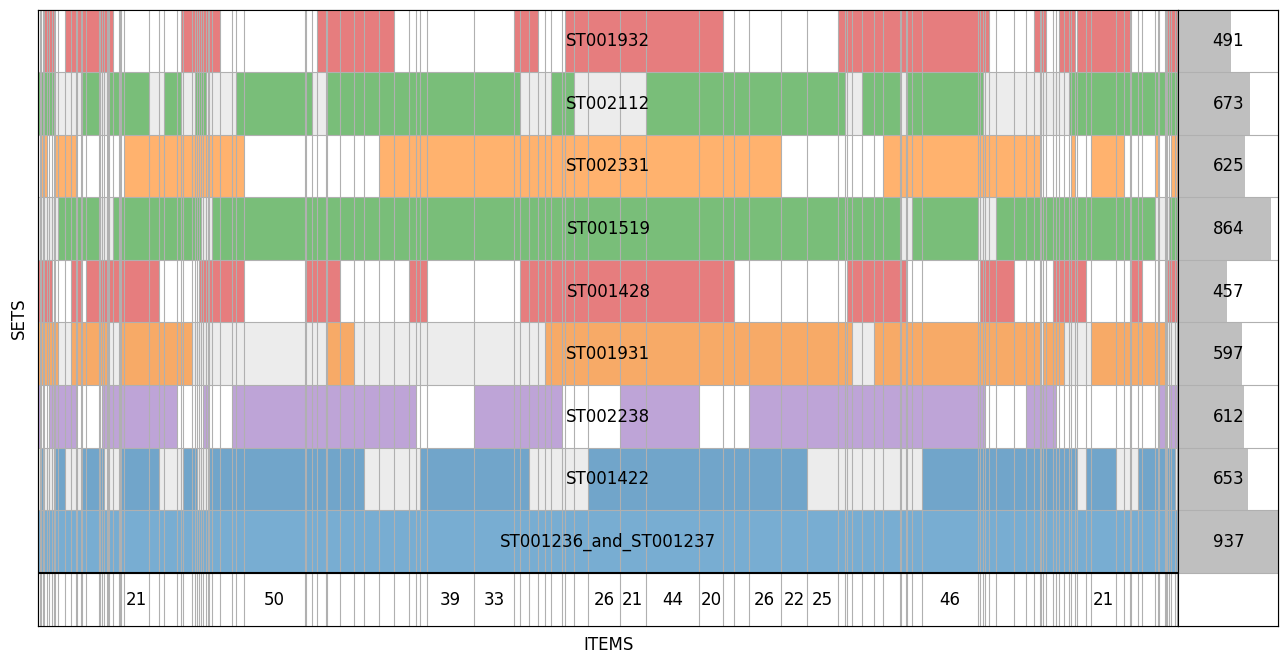

In [34]:
plt.figure(figsize=(16, 8))
# supervenn(sets, set_names,min_width_for_annotation=20,side_plots='right') #color_cycle
supervenn(sets, set_names,min_width_for_annotation=20,side_plots='right',color_cycle=[resuld_id_to_color[col] for col in set_names]) #color_cycle

In [17]:
metadata_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/combined_metadata.csv'
umap_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/umap_df_std_1.csv'
pca_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/hilic_pos_2024_feb_05_read_norm_poolmap/subset all_studies with align score 0.25 from Merge_Jan25_align_80_40_fillna_avg/num_cohorts_thresh_0.5/pca_df_std_1.csv'



In [30]:
metadata = pd.read_csv(metadata_file, index_col=0)
cohort_labels = metadata['label6']
resuld_ids = metadata['Result_ID']
# map the result ids to the cohort labels
resuld_id_to_label = dict(zip(resuld_ids, cohort_labels))
# map cohort labels to unique colors from tab10
cohort_label_to_color = dict(zip(cohort_labels.unique(), plt.cm.tab10.colors))

#map resuld ids to the unique colors
resuld_id_to_color = {k:cohort_label_to_color[v] for k,v in resuld_id_to_label.items()}


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

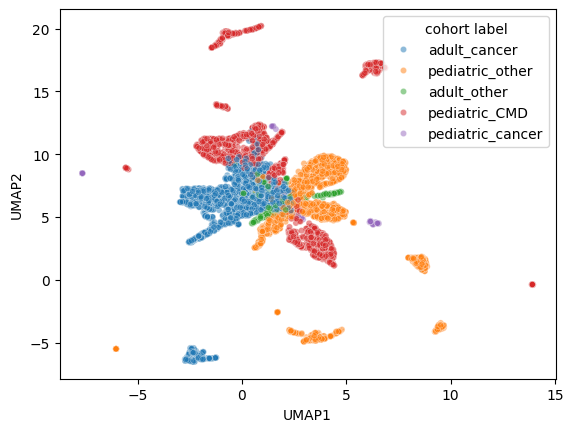

In [46]:
umap_df = pd.read_csv(umap_file, index_col=0)
umap_df['cohort label'] = metadata['label6']

sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='cohort label', palette=cohort_label_to_color, s=20, alpha=0.5)

<Axes: xlabel='PC1', ylabel='PC2'>

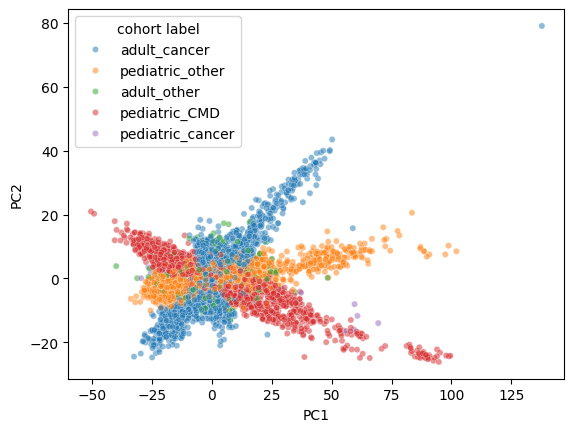

In [47]:
pca_df = pd.read_csv(pca_file, index_col=0)
pca_df['cohort label'] = metadata['label6']

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cohort label', palette=cohort_label_to_color, s=20, alpha=0.5)

In [49]:
import os
recon_y_file_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/reconstruction_study_feb16'

y_files = os.listdir(recon_y_file_dir)
y_files = [f for f in y_files if f.endswith('.csv')]
y_files = [f for f in y_files if 'y_' in f]

for y_file in y_files:
    y_df = pd.read_csv(os.path.join(recon_y_file_dir, y_file), index_col=0)
    y_df['cohort str'] = metadata.loc[y_df.index,'label6']
    y_df['study'] = metadata.loc[y_df.index,'Study_num'] 
    y_df['study str'] = metadata.loc[y_df.index,'Result_ID']

    y_df.to_csv(os.path.join(recon_y_file_dir, y_file), index=True)